### Loading the MNIST dataset in Keras

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load the mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


Using Theano backend.


11493376/11490434 [==============================] - 5s 0us/step


c:\users\bo\anaconda3\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


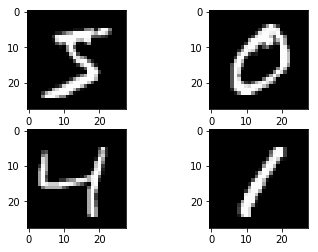

In [8]:
%matplotlib inline
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap = plt.get_cmap('gray'))
# show the plot
plt.show()

### Baseline Model with Multilayer Perceptrons

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [11]:
# fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)

In [31]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [32]:
# normalize inputs from 0-255 to 0-1
X_train = X_train /255
X_test = X_test/255

In [33]:
# one hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

In [24]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [25]:
model = baseline_model()

In [35]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 200, verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2750 - acc: 0.9215 - val_loss: 0.1388 - val_acc: 0.9582
Epoch 2/10
 - 7s - loss: 0.1098 - acc: 0.9685 - val_loss: 0.0900 - val_acc: 0.9729
Epoch 3/10
 - 7s - loss: 0.0696 - acc: 0.9801 - val_loss: 0.0718 - val_acc: 0.9767
Epoch 4/10
 - 7s - loss: 0.0497 - acc: 0.9857 - val_loss: 0.0691 - val_acc: 0.9790
Epoch 5/10
 - 7s - loss: 0.0364 - acc: 0.9897 - val_loss: 0.0648 - val_acc: 0.9801
Epoch 6/10
 - 7s - loss: 0.0262 - acc: 0.9932 - val_loss: 0.0621 - val_acc: 0.9804
Epoch 7/10
 - 7s - loss: 0.0203 - acc: 0.9951 - val_loss: 0.0566 - val_acc: 0.9815
Epoch 8/10
 - 7s - loss: 0.0157 - acc: 0.9963 - val_loss: 0.0580 - val_acc: 0.9809
Epoch 9/10
 - 7s - loss: 0.0109 - acc: 0.9977 - val_loss: 0.0612 - val_acc: 0.9808
Epoch 10/10
 - 7s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0553 - val_acc: 0.9841


In [37]:
scores = model.evaluate(X_test,Y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.59%


### Simple Convolutional NeuralNetwork for MNIST

In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using Theano backend.


In [2]:
# fix numpy random seed
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

#### The first step is to make sure the input dimensions are correct
For **keras.layers.Conv2D**, the argument data_format helps to specify the input dimensions.
**data_format**: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".

In [5]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2],1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1).astype('float32')

In [6]:
# normalize input from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255


In [7]:
# one hot encodes output
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32,(5,5), input_shape = (28, 28, 1),\
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [10]:
model = baseline_model()
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size =200, verbose =2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 96s - loss: 0.2361 - acc: 0.9331 - val_loss: 0.0770 - val_acc: 0.9760
Epoch 2/10
 - 86s - loss: 0.0707 - acc: 0.9789 - val_loss: 0.0423 - val_acc: 0.9867
Epoch 3/10
 - 87s - loss: 0.0500 - acc: 0.9847 - val_loss: 0.0365 - val_acc: 0.9883
Epoch 4/10
 - 85s - loss: 0.0412 - acc: 0.9871 - val_loss: 0.0371 - val_acc: 0.9873
Epoch 5/10
 - 85s - loss: 0.0323 - acc: 0.9899 - val_loss: 0.0338 - val_acc: 0.9883
Epoch 6/10
 - 81s - loss: 0.0275 - acc: 0.9917 - val_loss: 0.0323 - val_acc: 0.9899
Epoch 7/10
 - 80s - loss: 0.0233 - acc: 0.9926 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 8/10
 - 79s - loss: 0.0185 - acc: 0.9944 - val_loss: 0.0280 - val_acc: 0.9912
Epoch 9/10
 - 82s - loss: 0.0167 - acc: 0.9946 - val_loss: 0.0304 - val_acc: 0.9896
Epoch 10/10
 - 93s - loss: 0.0138 - acc: 0.9954 - val_loss: 0.0289 - val_acc: 0.9911


In [66]:
scores = model.evaluate(X_test,Y_test, verbose = 0)
print('%.2f%%' % (100- scores[1]*100))

1.04%


### Larger Convolutional Neural Network for MNIST

In [13]:
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape = (28, 28, 1), activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(15, (3,3),activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [15]:
model = larger_model()
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size =200, verbose =2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 67s - loss: 0.3679 - acc: 0.8897 - val_loss: 0.0733 - val_acc: 0.9777
Epoch 2/10
 - 89s - loss: 0.0949 - acc: 0.9711 - val_loss: 0.0497 - val_acc: 0.9832
Epoch 3/10
 - 81s - loss: 0.0706 - acc: 0.9779 - val_loss: 0.0387 - val_acc: 0.9867
Epoch 4/10
 - 93s - loss: 0.0589 - acc: 0.9818 - val_loss: 0.0372 - val_acc: 0.9873
Epoch 5/10
 - 101s - loss: 0.0505 - acc: 0.9839 - val_loss: 0.0355 - val_acc: 0.9885
Epoch 6/10
 - 126s - loss: 0.0444 - acc: 0.9859 - val_loss: 0.0304 - val_acc: 0.9902
Epoch 7/10
 - 96s - loss: 0.0386 - acc: 0.9878 - val_loss: 0.0312 - val_acc: 0.9900
Epoch 8/10
 - 80s - loss: 0.0368 - acc: 0.9883 - val_loss: 0.0312 - val_acc: 0.9894
Epoch 9/10
 - 93s - loss: 0.0329 - acc: 0.9890 - val_loss: 0.0299 - val_acc: 0.9894
Epoch 10/10
 - 87s - loss: 0.0307 - acc: 0.9898 - val_loss: 0.0268 - val_acc: 0.9903


In [16]:
scores = model.evaluate(X_test,Y_test)
print('%.2f%%' % (100- scores[1]*100))

10000/10000 [==============================] - 6s 583us/step
0.97%
